In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
def load_dataframes_to_arrays(cpp_path, python_path):
    """Loads expected dataframes from each platform into an array.

    Args:
        cpp_path (str): path to the expected dataframes .csv files for the cpp algorithms.
        python_path (str): path to the expected dataframes .csv files for the python algorithms.

    Returns:
        (list[dataframe], list[dataframe]): list of cpp dataframes, list of python dataframes.
    """
    python_dataframes = []
    cpp_dataframes = []

    for cpp_file in os.listdir(cpp_path):
        cpp_dataframes.append(pd.read_csv(cpp_path + cpp_file))

    for python_file in os.listdir(python_path):
        python_dataframes.append(pd.read_csv(python_path + python_file))

    return cpp_dataframes, python_dataframes

In [4]:
def insert_row_if_early_finish(cpp_dfs, run_time):
    """cpp algorithms should always have less run_time than python once, so we insert a row in their dataframes
    in order to prettify the combined graph later on.

    Args:
        cpp_dfs (list[DataFrame]): 1d array of dataframes for expected cpp algorithms.
        run_time (float): run time of cpp algorithms to make the graph constant after a while.

    Returns:
         list[DataFrame]: same as input but with an additional row if "finished early".
    """
    for idx, df in enumerate(cpp_dfs):
        col1, col2 = df.columns[0], df.columns[1]
        if df.iloc[-1][1] < run_time:
            new_row = {col1: df.iloc[-1][0], col2: run_time}
            cpp_dfs[idx] = pd.concat([cpp_dfs[idx], pd.DataFrame(new_row, index=[0])], ignore_index=True)
    return cpp_dfs

In [5]:
def combined_expected_graph(cpp_dfs, py_dfs, graphs_path, algo_seed):
    """Creating combined expected graph for cpp expected dataframes and python dataframes representing the algorithms output.

    Args:
        cpp_dfs (list[DataFrame]): list of cpp dataframes.
        py_dfs (list[DataFrame]): list of python dataframes.
        graphs_path (str): path to the folder which will contain all the graphs.

    Returns:
        None.

    Notes:
        There will be a vertical line across the graph somewhere. this line represents the time that cpp algorithms ran.
        Past this line cpp algorithms stopped running and the graph just continues as a CONSTANT.
        only the python algorithms run after this line to the end.
    """
    sns.set(rc={'figure.figsize': (20.7, 12.27)})
    for df in cpp_dfs:
        col1, col2 = df.columns[0], df.columns[1]
        name_arr = col1.split('_')
        if name_arr[1] == 'GREAT':
            label = '_'.join(name_arr[1:3])
        else:
            label = name_arr[1]
        plt.plot(df[col2], df[col1], label="CPP-" + label, linestyle='--', linewidth=4)

    for df in py_dfs:
        col1, col2 = df.columns[0], df.columns[1]
        name_arr = col1.split('_')
        if name_arr[1] == 'GREAT':
            label = '_'.join(name_arr[1:3])
        else:
            label = name_arr[1]
        plt.plot(df[col2], df[col1], label="Python-" + label, linestyle='-.', linewidth=1.5)

    plt.xlabel('time in seconds', fontsize=18)
    plt.ylabel('quality', fontsize=18, rotation='horizontal')
    plt.title(f'Combined Expected Graph \n algo seed: {algo_seed}', fontsize=18)
    plt.legend(loc='center left', bbox_to_anchor=(0.90, 0.5))
    plt.axvline(x=cpp_dfs[0].iloc[-2][1])  # represents the time where cpp algorithms stopped. only for CPP!
    plt.savefig(graphs_path + fr'Combined_Expected_Graph.pdf')

In [6]:
def automize_combined_expected_graphs(cpp_dataframes_path, python_dataframes_path, graphs_path, algo_seed):
    """Automating the combined expected graph process. at the end will result in .png file with
    combined graph for both cpp and python algorithms at the graphs_path location.

    Args:
        cpp_dataframes_path (str): path to the cpp dataframes location.
        python_dataframes_path (str): path to the python dataframes location.
        graphs_path (str): path to the graphs location.

    Returns:
        None.
    """
    cpp_dfs, python_dfs = load_dataframes_to_arrays(cpp_dataframes_path, python_dataframes_path)
    new_cpp_dfs = insert_row_if_early_finish(cpp_dfs, python_dfs[0].iloc[-1][1])
    combined_expected_graph(new_cpp_dfs, python_dfs, graphs_path, algo_seed)

In [7]:
algo_seed = '191190833'
cpp_dataframes_path = rf'../../copsimpleai/cpp_dataframes/algo_seed_{algo_seed}/'
python_dataframes_path = rf'../../copsimpleai/python_dataframes/algo_seed_{algo_seed}/'

cpp_df_path = cpp_dataframes_path + rf"expected_dataframes/"
python_df_path = python_dataframes_path + rf"expected_dataframes/"
graphs_path = rf'../../copsimpleai/graphs/algo_seed_{algo_seed}/'


<IPython.core.display.Javascript object>


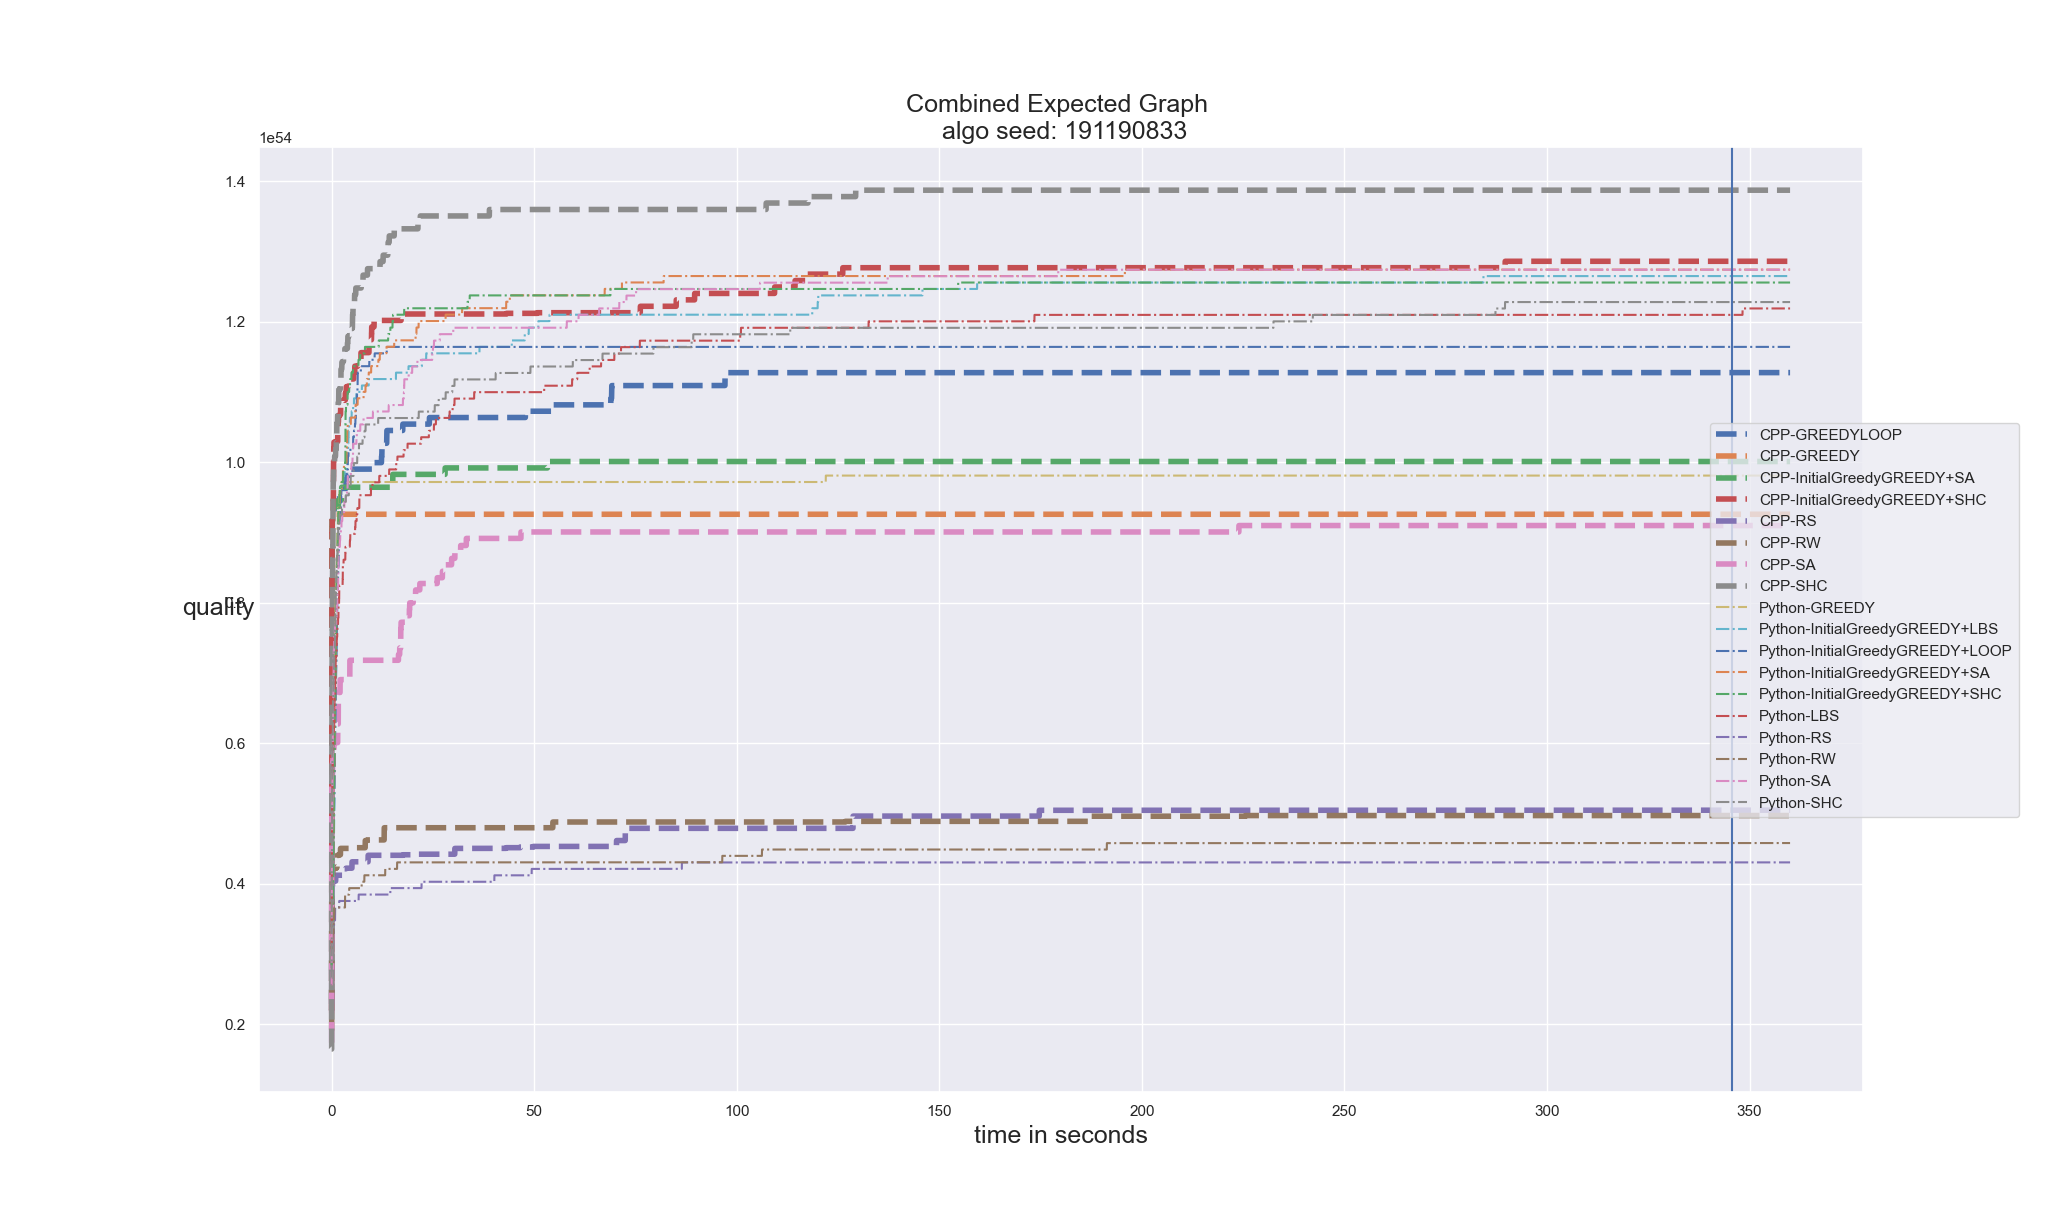

In [8]:
automize_combined_expected_graphs(cpp_df_path, python_df_path, graphs_path, algo_seed)